In [24]:
import os 
import numpy as np
import cv2
import gc

In [25]:
#Cargar los datos preprocesados
data = np.load('./data/datos_Preprocesados.npz')

In [26]:
X = data['arr_0']
y = data['arr_1']

In [27]:
#Comprobacion de datos cargados
#X.shape, y.shape -->((9959, 150, 150, 3), (9959,))


In [28]:
#np.unique(y)-->array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
#      dtype='<U15')

In [29]:
#Preprocesar "y"

from sklearn.preprocessing import OneHotEncoder
#La entrada a este transformador debe ser una matriz de números 
#enteros, indicando los valores tomados por características 
#categóricas (discretas).El resultado será una matriz dispersa 
#donde cada columna corresponde a un valor posible de una 
#característica.


In [30]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [31]:
#y_onehot --><9959x4 sparse matrix of type '<class 'numpy.float64'>'
#	with 9959 stored elements in Compressed Sparse Row format

In [32]:
y_array = y_onehot.toarray()

In [33]:
#y_array -->array([[1., 0., 0., 0.],
 #      [1., 0., 0., 0.],
 #      [1., 0., 0., 0.],
 #     ...,
 #      [0., 0., 0., 1.],
 #      [0., 0., 0., 1.],
 #      [0., 0., 0., 1.]])

#Primer columna es para Mask
#Primer columna es para Mask_Chin
#Primer columna es para Mask_Mouth_Chin
#Primer columna es para Mask_Nose_Mouth

In [34]:
#y_array.shape -->(9959, 4)

In [35]:
#Dividir datos en el entrenamiento y las pruebas

from sklearn.model_selection import train_test_split
#Divido los datos en 80% entrenamiento y 20% para el mejor tipo
x_train, x_test, y_train, y_test = train_test_split(X,y_array,test_size=0.2,random_state=42)

In [36]:
#x_train.shape, x_test.shape, y_train.shape, y_test.shape
#((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

In [37]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential


In [38]:
#Red Neuronal Convulsional

Modelo = Sequential([
    #Tres capas
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    #Aplanar
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    #Funcion sigmoidea
    #La función sigmoidea es una función logística matemática. 
    #Se usa comúnmente en estadísticas, procesamiento de señales de audio,
    #bioquímica y la función de activación en neuronas artificiales. 
    #La fórmula para la función sigmoidea es F(x) = 1/(1 + e^(-x))
    layers.Dense(4,activation='sigmoid')
])
#Compilar Red Neuronal Convulsional
Modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [39]:
#Modelo.summary()
#Salida:
#Model: "sequential_9"
#_________________________________________________________________
# Layer (type)                Output Shape              Param #   
#=================================================================
# conv2d_33 (Conv2D)          (None, 150, 150, 16)      448       
#                                                                 
# max_pooling2d_33 (MaxPoolin  (None, 75, 75, 16)       0         
# g2D)                                                            
#                                                                 
# conv2d_34 (Conv2D)          (None, 75, 75, 32)        4640      
#                                                                 
# max_pooling2d_34 (MaxPoolin  (None, 37, 37, 32)       0         
# g2D)                                                            
#                                                                 
# conv2d_35 (Conv2D)          (None, 37, 37, 64)        18496     
#                                                                 
# max_pooling2d_35 (MaxPoolin  (None, 18, 18, 64)       0         
# g2D)                                                            
#                                                                 
# flatten_9 (Flatten)         (None, 20736)             0         
#                                                                 
# dense_27 (Dense)            (None, 192)               3981504   
#                                                                 
# dense_28 (Dense)            (None, 28)                5404      
#                                                                 
# dense_29 (Dense)            (None, 4)                 116       
#                                                                 
#=================================================================
#Total params: 4,010,608
#Trainable params: 4,010,608
#Non-trainable params: 0
#_________________________________________________________________

In [40]:
#Entrenamiento de Red Neuronal Convulcional

history = Modelo.fit(x=x_train, y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=10)

Epoch 1/10
266/266 [==============================] - 56s 207ms/step - loss: 0.2027 - accuracy: 0.9291 - val_loss: 0.0710 - val_accuracy: 0.9774
Epoch 2/10
266/266 [==============================] - 54s 201ms/step - loss: 0.0716 - accuracy: 0.9782 - val_loss: 0.0619 - val_accuracy: 0.9794
Epoch 3/10
266/266 [==============================] - 55s 207ms/step - loss: 0.0428 - accuracy: 0.9847 - val_loss: 0.0561 - val_accuracy: 0.9804
Epoch 4/10
266/266 [==============================] - 56s 211ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.0564 - val_accuracy: 0.9794
Epoch 5/10
266/266 [==============================] - 57s 213ms/step - loss: 0.0178 - accuracy: 0.9938 - val_loss: 0.0372 - val_accuracy: 0.9869
Epoch 6/10
266/266 [==============================] - 57s 214ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0555 - val_accuracy: 0.9839
Epoch 7/10
266/266 [==============================] - 57s 214ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.0368 - val_ac

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
history_df = pd.DataFrame(history.history)

In [43]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.202679,0.929082,0.071024,0.977410
1,0.071595,0.978160,0.061936,0.979418
2,0.042824,0.984687,0.056118,0.980422
3,0.028021,0.990837,0.056429,0.979418
4,0.017837,0.993850,0.037174,0.986948
5,0.019327,0.993599,0.055537,0.983936
6,0.008749,0.997490,0.036803,0.989458
7,0.005753,0.998117,0.072936,0.982430
8,0.010460,0.996862,0.059231,0.982430
9,0.013724,0.994979,0.056802,0.985944


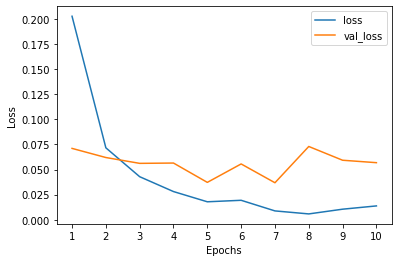

In [44]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

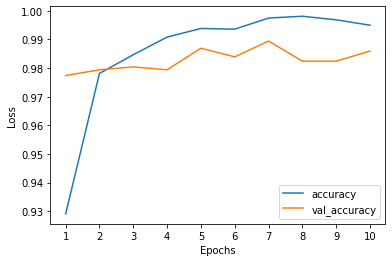

In [45]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [48]:
#Guardar Modelo 
Modelo.save('Modelo_cara_CNN')

INFO:tensorflow:Assets written to: Modelo_cara_CNN\assets


In [49]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]